# <p align="center">Hotel Customer Segmentation</p>

---

## <p align="center">*2 - Clustering*</p>

---

### 👥 **Team Members**
- **Ana Farinha** *(Student Number: 20211514)*  
- **António Oliveira** *(Student Number: 20211595)*  
- **Mariana Neto** *(Student Number: 20211527)*  
- **Salvador Domingues** *(Student Number: 20240597)*  

📅 **Date:** *March 10, 2025*  
📍 **Prepared for:** *Hotel C*  

---

# ToC

<a class="anchor" id="top"></a>


1. [Import Libraries & Data](#1.-Import-Libraries-&-Data) <br><br>

2. [Clustering](#2.-Clustering)<br>

    2.1 [Hierarchical Clustering](#2.1-Hierarchical-Clustering) <br>
    
    2.2 [K-means](#2.2-Kmeans) <br>

# 1. Import Data & Libraries

In [7]:
import pandas as pd
import numpy as np

# Clustering Algorithms
from sklearn.cluster import DBSCAN, MeanShift, KMeans, \
    AgglomerativeClustering, estimate_bandwidth

# Visualisations
import matplotlib.pyplot as plt

# External Functions File
import functions as f

pd.set_option('display.max_columns', None)

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

**Data**

In [2]:
df = pd.read_csv('./Case1_HotelCustomerSegmentation.csv', 
                 sep = ';', index_col = 'ID')
df

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,0,2,6,4,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0
111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,0,1,10,5,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0


In [3]:
## TEMP

# Scalers
from sklearn.preprocessing import RobustScaler, StandardScaler, \
                                  MinMaxScaler

df = df.dropna()
df.drop(['Nationality', 'NameHash', 'DocIDHash', 'DistributionChannel',
          'MarketSegment'], 
        axis = 1, inplace = True)

scaled_data = MinMaxScaler().fit_transform(df)
scaled_data = pd.DataFrame(scaled_data, 
                           columns=df.columns, 
                           index=df.index)

In [4]:
scaled_data

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,
1,0.466165,0.299481,0.101868,0.020791,0.009290,0.066667,0.0,0.026316,0.051724,0.034483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.315789,1.000000,0.001698,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.533835,1.000000,0.159593,0.017088,0.006773,0.000000,0.0,0.013158,0.086207,0.043103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.466165,1.000000,0.001698,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.488722,1.000000,0.100170,0.016376,0.002709,0.000000,0.0,0.013158,0.034483,0.017241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111729,0.308271,0.000000,0.001698,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
111730,0.398496,0.000000,0.290323,0.053774,0.002258,0.000000,0.0,0.013158,0.086207,0.043103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
111731,0.353383,0.000000,0.001698,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Analyze Principal Components

(41188, 2)


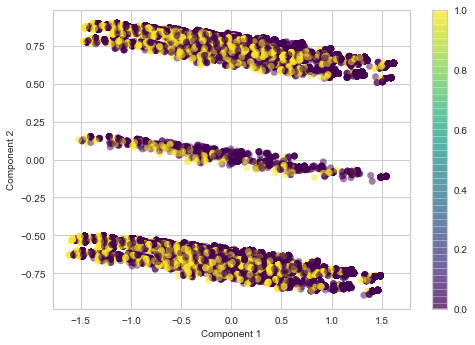

In [ ]:
# Let's use PCA to visualize with only two components
pca2 = PCA(n_components = 2)
pca2.fit(X)
X_pca2 = pca2.transform(X)
print(X_pca2.shape)

# Scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=X.y, edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

The two main components visualization shows that there seems to exist three or six clusters. Three horizontal clusters, with some other separated clusters at the right.

In [ ]:
# Fit the PCA algorithm to data 
pca = PCA().fit(X)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(X.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.146522,0.146522
1,2,0.118040,0.264562
2,3,0.094042,0.358604
3,4,0.082169,0.440773
4,5,0.074665,0.515438
5,6,0.069559,0.584997
6,7,0.063782,0.648779
7,8,0.061127,0.709906
8,9,0.048925,0.758831
9,10,0.046672,0.805502


Text(0.5, 1.0, 'Explained variance by components')

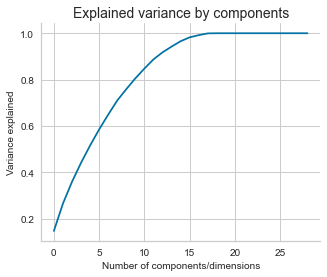

In [ ]:
# Plot the cumulative explained variance

# Draw
fig , ax = plt.subplots(figsize=(5, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Decoration
sns.despine()
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance explained')
plt.rc('axes', labelsize=subPlots_label_fontSize)
plt.title('Explained variance by components', fontsize=plots_Title_fontSize)

With 15 components is possible to explain 96.5% of the variance.

# 2. Clustering

## 2.1 Hierarchical Clustering

In [ ]:
agg_clust = AgglomerativeClustering().fit(scaled_data)

In [22]:
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_clust, truncate_mode="level", p=50)
plt.axhline(y = 200, color = 'r', linestyle = '-')

plt.show()

NameError: name 'plt' is not defined

**Final Model for HC**

In [ ]:
linkage = 'complete'
distance = 'manhattan'
n_clusters = 2

hclust = AgglomerativeClustering(linkage=linkage, 
                                 metric=distance, 
                                 n_clusters=n_clusters)

hc_labels = hclust.fit_predict(scaled_data)

In [ ]:
f.cluster_profiling(df, hc_labels, "Hierarchical")

## 2.2 K-Means

In [ ]:
# Apply the dimension reduction to the dataset (for 15 components)
pca_reduced = PCA(n_components = 15)
pca_reduced.fit(X)
X_pca_reduced = pca_reduced.transform(X) 
print(X_pca_reduced.shape)

(41188, 15)


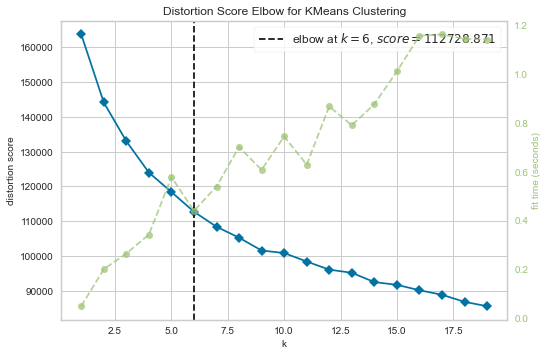

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Apply the Elbow method to select K
km = KMeans()
visualizer = KElbowVisualizer(km, k=(1,20), random_state=123)
visualizer.fit(X_pca_reduced)
visualizer.show() 

In [5]:
dispersion = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    dispersion.append(kmeans.inertia_)

**Elbow Method**

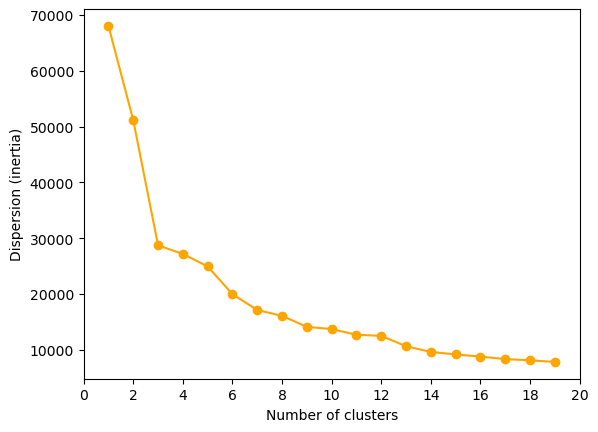

In [9]:
plt.plot(range(1, 20), dispersion, marker='o', color='orange')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.xticks(np.arange(0, 21, step=2))  
#plt.vlines(7, 5000, 600000, color='red')

plt.show()

**Final Model for KM**

In [10]:
kmclust = KMeans(n_clusters = 3)

km_labels = kmclust.fit_predict(scaled_data)

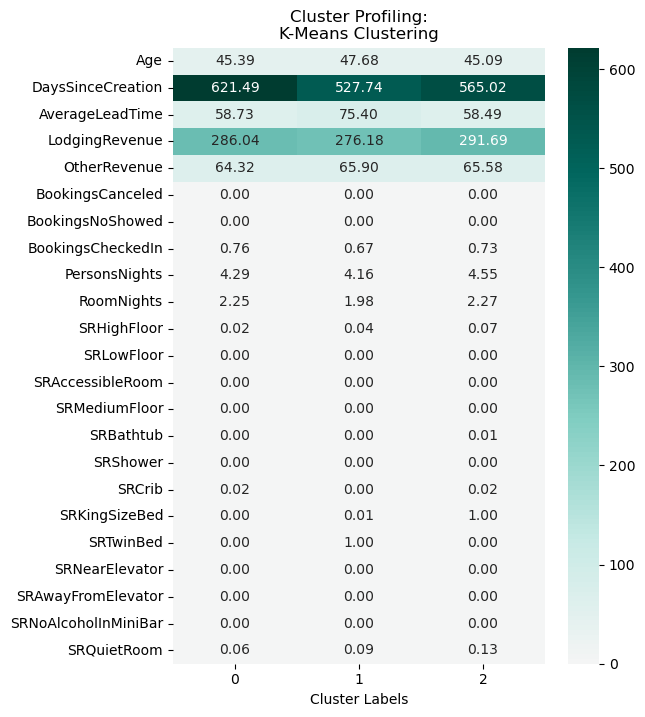

In [15]:
cluster_profiling(df, km_labels, "K-Means")

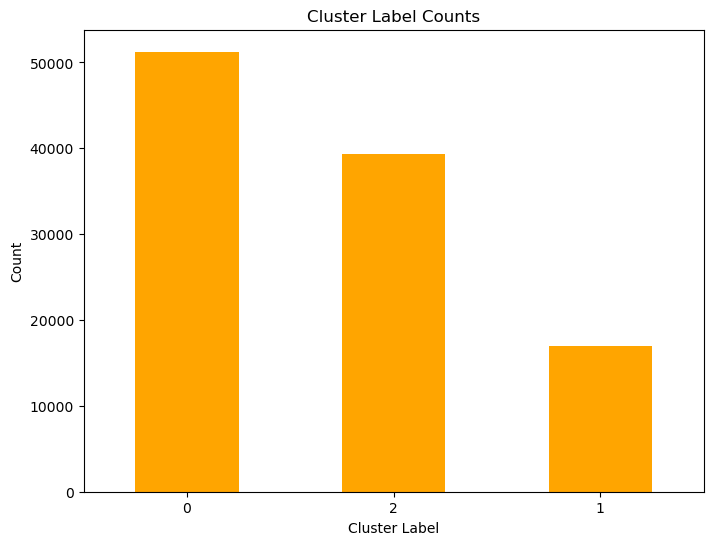

In [21]:
plot_counts(km_labels)

# Para quando for feito o PCA

If a column has high absolute values in a component, that feature strongly influences that component.
We can determine which features contribute most to variance in the data.

In [ ]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca.components_,columns=X.columns)
wheightsDF

,default_no,default_unknown,default_yes,housing_no,housing_yes,housing_unknown,loan_no,loan_yes,loan_unknown,poutcome_nonexistent,...,job_admin.,job_blue-collar,job_technician,job_Other,marital_married,marital_single,marital_Other,education_high.school,education_university.degree,education_Other
0,-0.263703,2.636227e-01,8.082138e-05,0.065276,-0.066780,0.001504,0.011995,-0.013499,0.001504,0.052917,...,-0.281940,0.285499,-0.000656,-0.002903,0.356974,-0.328934,-0.028040,-0.146866,-0.332990,0.479856
1,0.014083,-1.411862e-02,3.569667e-05,0.701199,-0.702042,0.000843,0.047450,-0.048293,0.000843,0.014771,...,0.028594,-0.027613,-0.011615,0.010634,-0.029543,0.024236,0.005307,0.032374,0.030894,-0.063269
2,0.052819,-5.278139e-02,-3.774934e-05,0.015163,-0.015901,0.000737,0.004060,-0.004798,0.000737,-0.001844,...,-0.063562,0.311711,0.166722,-0.414871,-0.390427,0.385467,0.004960,-0.176385,-0.226200,0.402586
3,-0.132356,1.323615e-01,-5.654380e-06,-0.004906,0.003325,0.001581,0.018801,-0.020382,0.001581,-0.034197,...,-0.230255,-0.076117,-0.070939,0.377310,-0.455762,0.344545,0.111217,0.162021,-0.209130,0.047109
4,-0.391866,3.918668e-01,-4.113527e-07,-0.006077,0.003884,0.002193,-0.044648,0.042455,0.002193,0.122544,...,0.427100,0.084817,-0.036818,-0.475099,-0.111010,0.083499,0.027510,-0.063100,0.226979,-0.163879
5,-0.464569,4.645715e-01,-2.126449e-06,-0.014870,0.012220,0.002649,-0.006017,0.003368,0.002649,0.094042,...,-0.121231,-0.045790,-0.090523,0.257544,-0.051582,0.096447,-0.044865,0.158772,-0.023583,-0.135188
6,0.023484,-2.342245e-02,-6.191278e-05,0.018992,-0.078503,0.059511,-0.729411,0.669899,0.059511,-0.007502,...,-0.023813,0.005534,-0.017617,0.035896,0.001012,0.003693,-0.004705,0.012669,-0.033192,0.020523
7,0.054848,-5.490080e-02,5.276311e-05,-0.011390,0.013798,-0.002409,0.010872,-0.008463,-0.002409,-0.005823,...,0.168820,0.138195,-0.104670,-0.202345,0.096516,-0.063506,-0.033010,0.711520,-0.544242,-0.167278
8,-0.055977,5.604375e-02,-6.652797e-05,0.013067,-0.013211,0.000144,0.009925,-0.010069,0.000144,-0.493190,...,0.219783,0.122811,-0.218693,-0.123901,0.088106,-0.019814,-0.068292,0.000593,-0.024920,0.024327
9,-0.120039,1.198677e-01,1.717583e-04,0.005993,-0.008904,0.002911,-0.006521,0.003610,0.002911,-0.511061,...,-0.094388,0.039485,-0.046586,0.101489,-0.014007,0.045310,-0.031303,-0.072407,0.094281,-0.021874


### Este código é para fazer para o n de components usado

In [ ]:
# Study the weights of component 15
comp = abs(wheightsDF.iloc[14])  ## index 14 is component 15
comp = comp.sort_values(ascending=False)
comp

age_bins_20-29                 0.555727
y                              0.508653
age_bins_50-59                 0.364155
marital_single                 0.319757
marital_Other                  0.310479
age_bins_40-49                 0.184295
poutcome_failure               0.129981
poutcome_success               0.121932
job_blue-collar                0.119980
education_high.school          0.081874
job_admin.                     0.072328
education_Other                0.064399
default_no                     0.037842
default_unknown                0.037768
job_Other                      0.029656
job_technician                 0.017996
education_university.degree    0.017475
age_bins_30-39                 0.013768
age_bins_>=60                  0.013675
marital_married                0.009277
poutcome_nonexistent           0.008049
age_bins_<20                   0.007184
housing_no                     0.003713
loan_yes                       0.003356
loan_unknown                   0.002016


<div class="alert-danger">
  
# Não tenho a certeza de isto será aqui ou noutro ficheiro, mas talvez aqui faça mais sentido

# Cluster Evaluation

### Quality of clustering

Before proceeding with further analysis, we need to validate that our clusters align with our expectations. This involves two key steps:  

1. **Visual Inspection:** we need to check whether the clusters make intuitive sense. Do examples that we consider similar fall into the same cluster? If not, we may need to reconsider our clustering approach or features, for instance.


2. **Quantitative Metrics:** we will evaluate our cluster quality using two metrics: 
- cluster cardinality: Cluster cardinality refers to the number of examples in each cluster. Very large or very small clusters might indicate issues, like one cluster capturing mostly noise.

- cluster magnitude: Measures the spread of a cluster, measured by the total distance of all points to the cluster center. Clusters with very high magnitude may contain more dispersed data points.

Visual Inspection

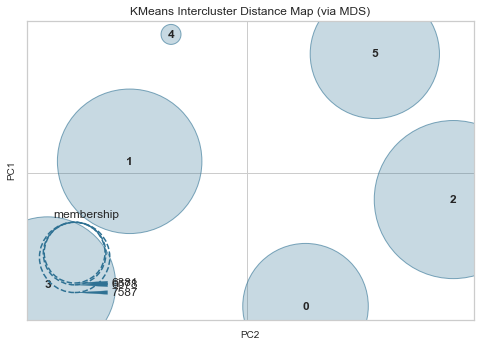

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [ ]:
# Visualizing the clusters sizes and distances in 2D
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X_pca_reduced)
visualizer.show()

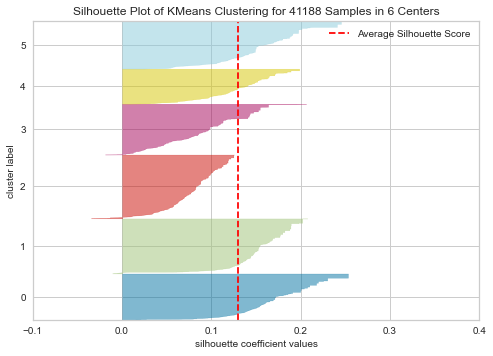

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 41188 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Visualize Silhouette - see https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_pca_reduced)
visualizer.show()

Cluster Cardinality

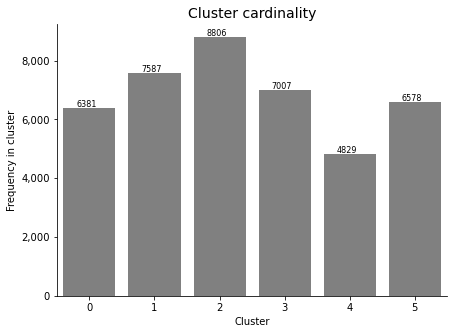

In [ ]:
# Plot clusters cardinality 

# Count observations per cluster
freqByCluster = X_beforeNorm.groupby(y_kmeans).size()

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x=y_kmeans, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(freqByCluster):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster cardinality", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster")
plt.rc('axes', labelsize=subPlots_label_fontSize)

Cluster Magnitude

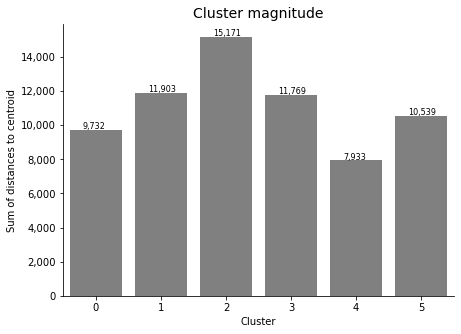

In [ ]:
# Plot clusters magnitude

# Compute Magnitude
X['distanceToCentroid'] = np.min(allDistances,axis=1)
magnitude = X['distanceToCentroid'].groupby(y_kmeans).sum()
X = X.drop(columns=['distanceToCentroid'])

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.barplot(x=magnitude.index, y=magnitude.values, color='grey')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(magnitude):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data:,.0f}" , fontdict=dict(fontsize=plots_barTexts_fontSize))
sns.despine()
plt.title("Cluster magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cluster")
plt.ylabel("Sum of distances to centroid")
plt.rc('axes', labelsize=subPlots_label_fontSize)

Magnitude versus cardinality

The Cardinality vs Magnitude plot compares cluster cardinality with cluster magnitude. Clusters with a higher cardinality tend to also have a higher cluster magnitude. Using this graph, we can identify anomalous clusters by looking for ones that are not very close to the 45-degree line.

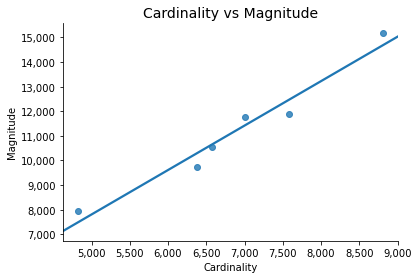

In [ ]:
# Plot cardinality vs magnitude

# Draw
fig, ax = plt.subplots(figsize=(6,4))
g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)
sns.despine()
plt.title("Cardinality vs Magnitude", fontsize=plots_Title_fontSize)
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")
plt.rc('axes', labelsize=subPlots_label_fontSize)